In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
df = pd.read_csv("../Data/Books_clean.csv",index_col=0)

In [14]:
df.head(1)

,Book_author,Book_img,Book_description,Book_rating,Book_votes,Book_title,Book_genre
0,William Shakespeare,https://images-na.ssl-images-amazon.com/images...,"In Romeo and Juliet, Shakespeare creates a vio...",7.48,2462752,Romeo and Juliet,Classics|Plays|Fiction|Romance


In [15]:
df.isnull().sum()

Book_author         0
Book_img            0
Book_description    1
Book_rating         0
Book_votes          0
Book_title          0
Book_genre          0
dtype: int64

In [5]:
df = df.fillna("No description")

In [6]:
df_filtered = df[df["Book_votes"] > 1000]

In [7]:
df_numeric = df_filtered.select_dtypes(include=np.number)
df_numeric

,Book_rating,Book_votes
0,7.48,2462752
1,8.04,888492
2,7.80,836710
3,7.78,368863
4,7.90,513517
...,...,...
13502,8.14,163069
13503,8.06,145654
13504,7.08,97741
13505,8.40,232425


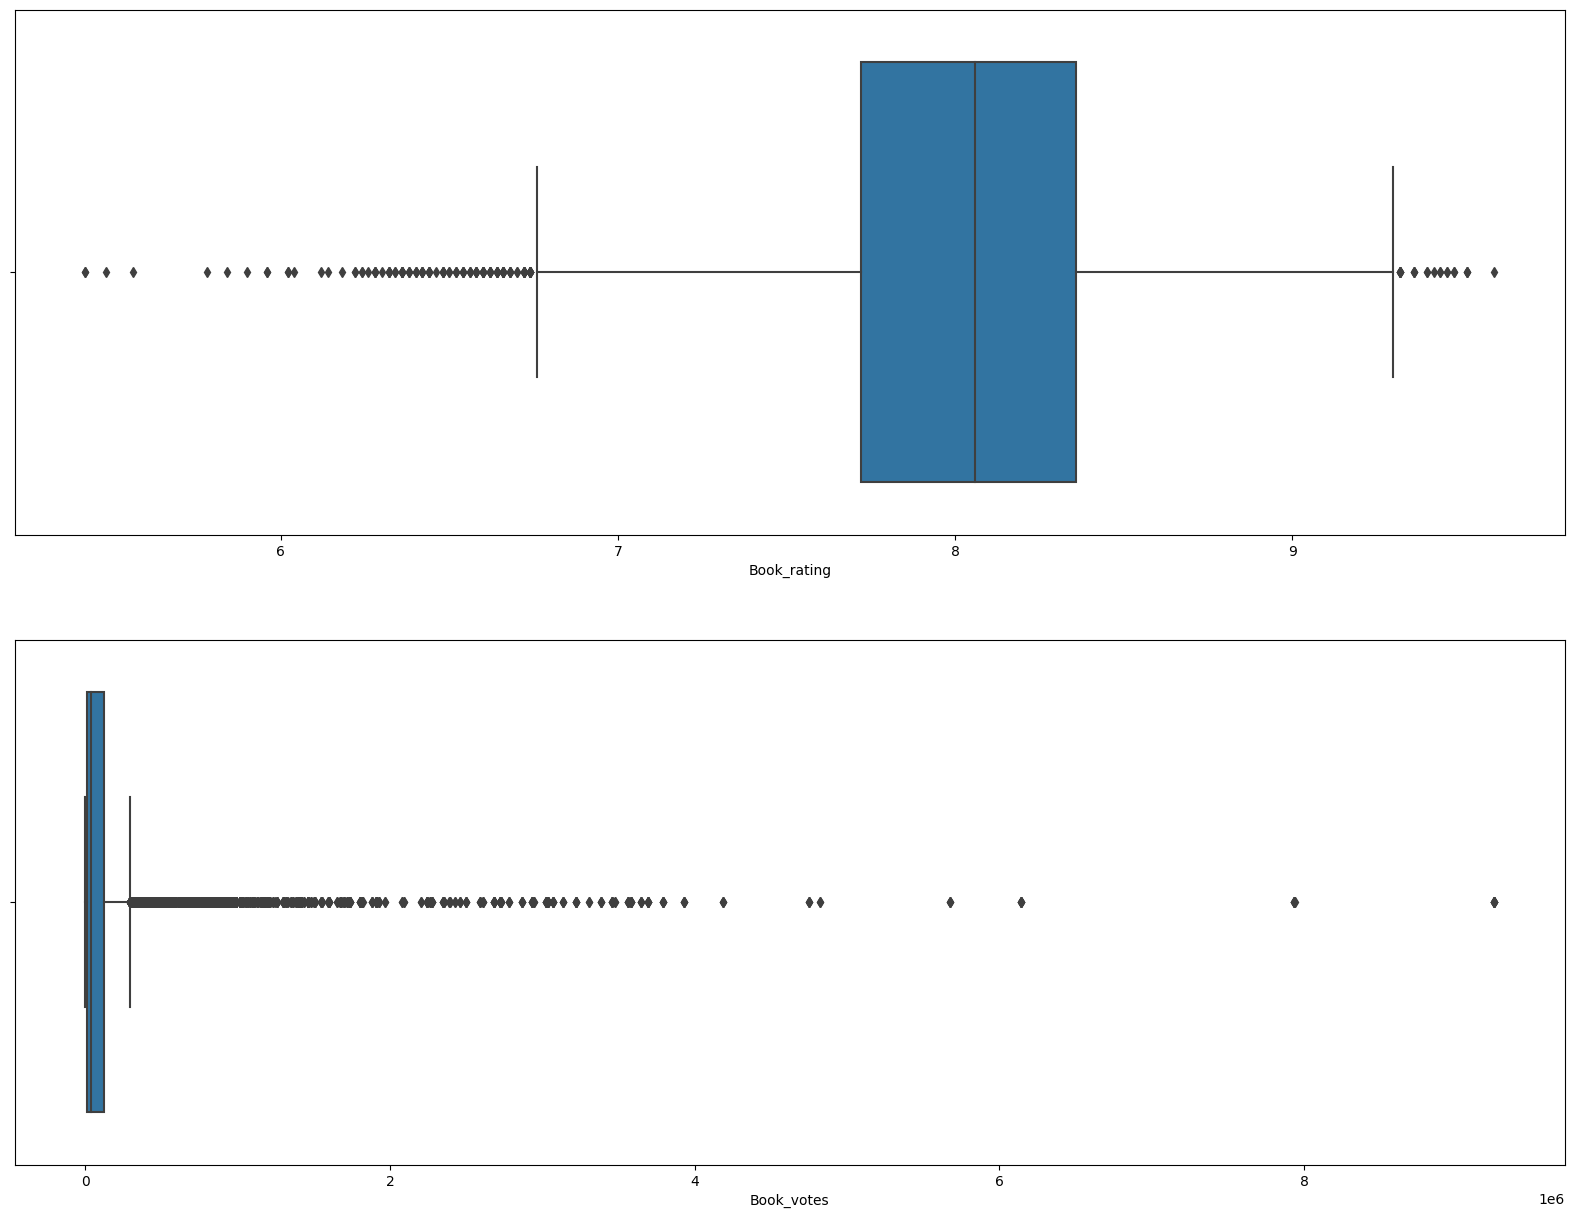

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(20,15))

for i in range(len(df_numeric.columns)):
    sns.boxplot(x=df_numeric.columns[i], data=df_numeric, ax=ax[i])
plt.show()

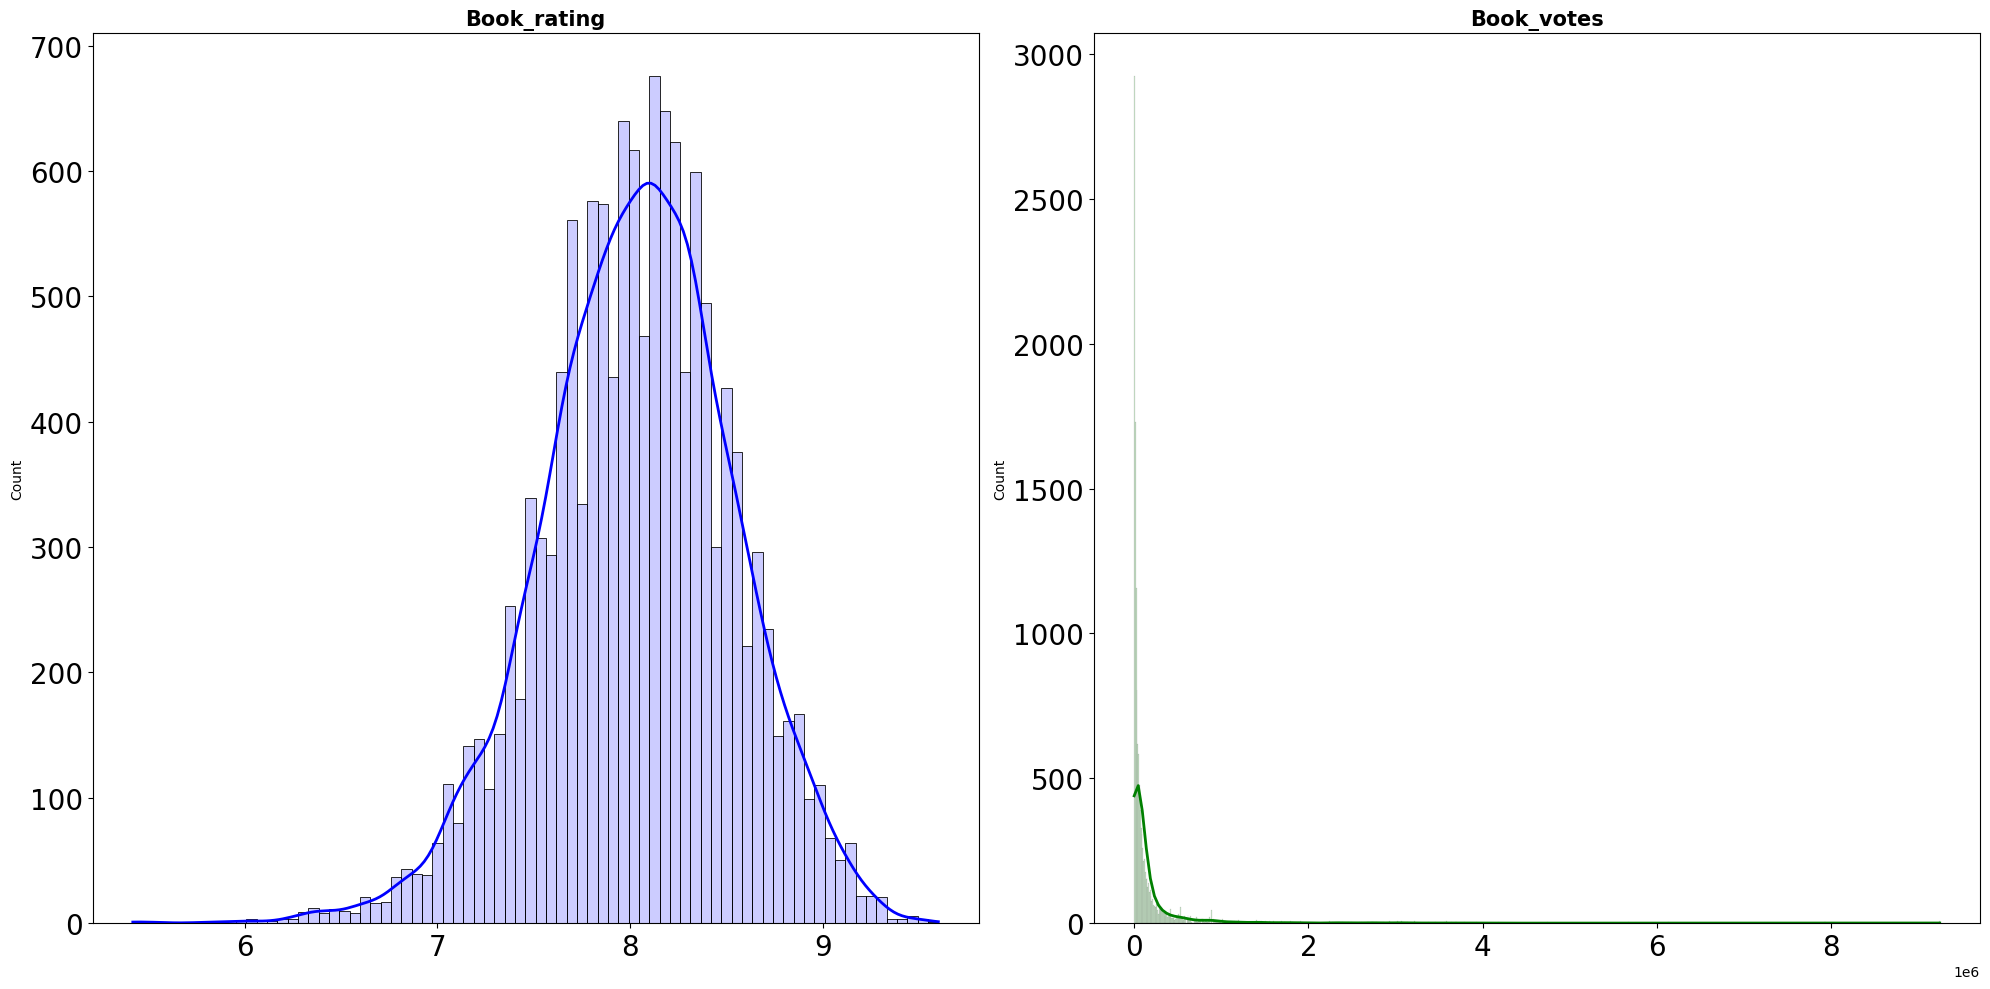

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange","orange","blue","yellow","purple"]

axes = axes.flat

columnas_numeric = df_filtered.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_filtered,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();